# Repräsentative Stichproben

Hier wird erklärt, wie man Eigenschaften einer großen Menge mit relativ wenig Aufwand ermitteln kann, indem man repräsentative Stichproben zieht.

Das Dokument richtet sich an Leser, deren Erinnerung an ihren Schulunterricht in Kombinatorik und Wahrscheinlichkeitrechnung inzwischen verblasst ist.

Für die Beschreibung des Vorgehens wird ein einfaches, aber praxisnahes Beispiel verwendet: 

Ein Unternehmen mit etwa 500 IT-Projekte pro Jahr fordert, dass die Projekte Quality Gates durchführen, um Risiken zu reduzieren und die Projektqualität zu fördern. In einem Quality Gate werden Zwischenergebnisse eines Projekts geprüft, um sicherzustellen, dass die Voraussetzungen für die nächsten Projektphase erfüllt sind. So werden beim Design Quality Gate Spezifikationsdokumente per Review geprüft, die für die folgende Umsetzungsphase benötigt werden, z.B. die Sicherheitsklassifikation der zu erstellenden Anwendung.

Das Unternehmen will nun wissen, ob die Projekte tatsächlich die geforderten Quality Gates durchführen. Ganz genau wüsste man das, wenn man jedes Projekt kontrolliert. Das ist aber wegen des hohen Kontrollaufwands nicht praktikabel. Daher will man sich auf eine Stichprobe beschränken.

Das wirft folgende Fragen auf, die in den folgenden Abschnitten beantwortet werden:

1. Wie stellt man sicher, dass die Auswahl der Projekte für die Stichprobe repräsentativ ist?
2. Wie umfangreich muss die Stichprobe mindestens sein?

Um diese Fragen zu beantworten, ist ein paar einfache Berechnungen notwendig. Der entsprechende Python-Code ist in dieses Dokument integriert. Die Ergebnisse der Berechnungen werden durch Graphiken illustriert, die ebenfalls mit Python erstellt werden. Den Code kann man interaktiv ausführen und nach belieben ändern, z.B. indem man seine eigenen Werte für die Anzahl der Projekte einträgt (oder was immer man mit Stichproben überprüfen will).

Der Python-Code ist ausführlich kommentiert; zu seinem Verständnis sind keine speziellen Python-Kenntnisse notwendig, aber Erfahrungen mit einer anderen Programmiersprache wie Java sind hilfreich.

Im Anhang findet man weitere Informationen:

1. Wieso funktionieren Stichproben überhaupt?
2. Wie benutze ich dieses Dokument am besten?
3. Wo finde ich weitere Informationen zu Python und IPython Notebooks (dem speziellen Dokumentenformat, das hier verwendet wird)?


<h2 id="Repräsentative Auswahl"> Repräsentative Auswahl</h2>

Damit man aus einer Stichprobe auf die Grundgesamtheit schließen kann, aus der die Stichprobe gezogen wurde, muss die Stichprobe repräsentativ sein. Dafür muss sie zum einen hinreichend umfangreich sein, zum anderen muss die Auswahl zufällig erfolgen. Um den letzten Punkt geht es in diesem Abschnitt, der Mindestumfang von repräsentativen Stichproben wird dann im folgenden Abschnitt behandelt.

Zunächst zur zufälligen Auswahl. In unserem Beispiel geht es zunächst darum, die zu kontrollierenden Projekte auszuwählen. Bei den Projekten, die im Kontrollzeitraum (z.B. dem 2. Quartal eines Jahres) ein oder mehrere Quality Gates durchgeführt haben, lost man in einem zweiten Schritt aus, welches der durchgeführten Quality Gates man kontrolliert.

Beide Auswahlverfahren basieren darauf, dass die Auswahl durch Zufallszahlen gesteuert wird. So stellt man sicher, dass keine - auch unbewusste - Filterung der Projekte oder Quality Gates stattfindet, wie es bei einer Auswahl "von Hand" kaum zu vermeiden ist.

Im folgenden Abschnitt wird die zufällige Auswahl von Projekten erklärt, dann folgt ein Abschnitt über die zufällige Auswahl des zu kontrollierenden Quality Gates.

<h3 id="Zufallsstichprobe"> Zufallsstichprobe aus einer Menge von Projekten</h3>

Aus einer Grundgesamtheit von N Projekten soll eine Stichprobe von k Projekten zufällig ausgelost werden. Jedes Projekt soll nur einmal gezogen werden (Ziehen ohne Zurücklegen).

Diese Aufgabe kann man in Python ganz einfach lösen: Man erzeugt eine Folge von Zahlen zwischen 1 und N, aus denem man zufällig k Zufallszahlen auswählt.

Wie man die Größe von k bestimmt, wird im Abschnitt zum Mindestumfang der Stichprobe weiter unten erklärt.

In [1]:
import numpy as np
N = 500 # Umfang der Grundgesamtheit
k = 46  # Umfang der Stichprobe
stichprobe = np.random.choice(N + 1, k, False)
# Den Inhalt von "stichprobe" anzeigen:
stichprobe

array([293, 413, 266, 357, 341, 482, 162,  61,  27, 212, 446, 495,  65,
       305, 336, 188, 196, 338, 346, 118,  96, 167, 175, 438, 358, 372,
        76, 134,  20,  92, 163,  24, 318, 381,  40, 141, 184, 321, 364,
       155, 434, 326, 472, 368, 178, 207])

Mit wenig Aufwand kann man die Zahlen in einen "random walk" umwandeln und als Graphik anzeigen, um einen visuellen Eindruck von der "Zufälligkeit" der Zahlenfolge zu gewinnen. Wenn der "random walk" klare Trends oder periodische Schwankungen zeigen würde, müsste man an der Zufälligkeit der Zahlenfolge ernsthaft zweifeln. Aber die Graphik sieht sehr regellos aus und verändert sich bei jeder neuen Berechnung auf unvorhersehbare Weise. Das sind gute Indikatoren für eine hinreichende Zufälligkeit. Einen statistischen Nachweis sparen wir uns hier im Vertrauen auf die Python-Community.

Populating the interactive namespace from numpy and matplotlib


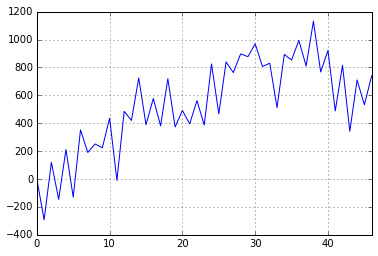

In [2]:
def plotIrrweg(sequenz):
    # Macht aus einer Abfolge von (hoffentlich) zufälligen Zahlen einen "random walk" und stellt ihn graphisch dar
 df1.iQgTyp
    position = 0
    irrweg = [position]
    for i in range(len(sequenz)):
        # die Zufallszahlen werden abwechselnd als positiv oder negativ interpretiert und zum "Irrweg" aggregiert
        schritt = sequenz[i] if i % 2 else -sequenz[i]
        position += schritt
        irrweg.append(position)
    irrwegDF = pd.DataFrame(irrweg, columns=['Position'], index=np.arange(0, len(irrweg)))
    # Direktive für die Graphik-Ausgabe
    %pylab inline
    irrwegDF.plot(legend = False)
plotIrrweg(stichprobe)

## Zufallsstichprobe aus den Quality Gates eines Projekts
Nachdem ein Projekt ausgewählt worden ist, soll nun je gezogenem Projekt das zu kontrollierende Quality Gate ebenfalls per Zufall bestimmt werden. 

Das Quality Gate Q1 wird vor Beginn des eigentlichen Projekts durchgeführt; sein erfolgreiches Bestehen ist die Voraussetzung dafür, dass das Projekt gestartet werden kann. Für Stichproben-Kontrollen sind daher nur die Quality Gates Q2 bis Q5 interessant.

Für k Projekte brauchen wir daher eine Zufallszahlenfolge mit ganzen Zahlen zwischen 2 und 5, die für die Quality Gates QG2 bis QG5 stehen. Diese Zahlenfolge muss mehr als k Elemente enthalten, denn wir wissen im Voraus nicht, welche Quality Gates bei einem konkreten Projekt tatsächlich kontrollierbar sind. 

Beispiel: Das erste gezogene Projekt hat die Nummer 153. Die erste gezogene Quality Gate ist 5, also QG5. Das Projekt befindet sich aber noch in der Testphase, d.h. es hat erst die Quality Gates QG2 und QG3 durchgeführt. Nur diese beiden sind kontrollierbar. In diesem Fall iteriert man so lange durch die Zufallsfolge der Quality Gates, bis man auf eine 2 oder 3 stößt. Das entsprechende Quality Gate kontrolliert man dann. Beim nächsten Projekt fährt man mit der nächsten Zahl aus der Quality-Gate-Folge fort usw.

[5 3 3 5 4 2 4 4 4 4 3 3 3 5 4 3 4 2 4 4 3 2 5 4 4 2 3 5 5 2 5 5 3 4 5 2 4
 2 4 2 2 4 5 2 5 3 5 2 3 2 4 4 5 4 5 2 2 4 3 5 2 3 2 2 5 2 2 2 3 5 5 2 4 5
 4 3 2 4 4 4 5 4 4 4 2 3 2 3 5 4 3 4 5 3 4 4 4 4 3 2 5 3 3 5 4 3 5 2 3 5 5
 5 3 3 3 2 2 3 4 5 4 5 2 3 5 5 5 3 4 3 5 4 5 5 3 3 3 4]
Populating the interactive namespace from numpy and matplotlib


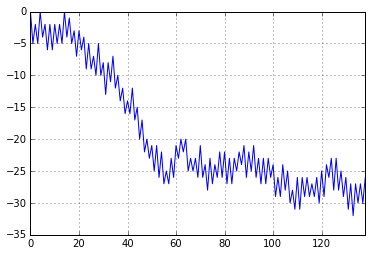

In [3]:
qgStichprobe = np.random.choice(range(2, 5 + 1), 3 * k, True) # 3k Zufallszahlen reichen wohl
print qgStichprobe
plotIrrweg(qgStichprobe)

## Mindestumfang von repräsentativen Stichproben bestimmen

Warum eine repräsentative Stichprobe mindestens einen gewissen Umfang haben muss, versteht man am einfachsten, wenn man die Extreme betrachtet: Wenn man alle Quality Gates kontrolliert, weiß man exakt und absoluter Sicherheit, ob die Projekte die Quality Gates durchführen. Kontrolliert man dagegen kein einziges Quality Gate, weiß man nichts darüber, ob die Quality Gates eingehalten werden. Irgendwo dazwischen liegt das Optimum, bei dem mit einem vertretbaren Aufwand einen "ausreichenden" Aufschluss über die Quality-Gate-Situation bekommt.

Was bedeutet hier ausreichend? Das hängt von den Anforderungen ab, die man an die Aussagekraft der Stichproben stellt. Wenn man mehrere gleichgroße Stichproben auswertet, wird man bei jeder Stichprobe zu etwas unterschiedlichen Ergebnisse kommen, was die Anteil der korrekten Quality Gates betrifft, denn durch die zufällige Auswahl wird man im einen Fall mal etwas mehr "gute" Quality Gates ziehen als im anderen. Insgesamt streuen die Anteilswerte um einen Mittelwert. Je mehr Stichproben man auswertet, um so genauer spiegelt dieser Mittelwert den wahren Anteilswert in der Grundgesamtheit wider. Und um so kleiner wird die Streuung der ermittelten Anteilswerte um ihren Mittelwert.

Unserem Problem, eine Menge von Quality Gates stichprobenhaft zu kontrollieren, entspricht in der Statistik das Modell des "Ziehens ohne Zurücklegen". Man stellt sich dabei vor, die Quality Gates seien Kugeln in einer Lostrommel, wobei weiße Kugeln die korrekt durchgeführten Quality Gates sind und schwarze Kugeln die fehlerhaften oder nicht durchgeführten Quality Gates. Die Wahrscheinlichkeit dafür, in einer Stichprobe einen bestimmen Anteil von weißen Kugeln zu ziehen, folgt der "hypergeometrischen Verteilung". In einer Stichprobe ist der Anteilswert am wahrscheinlichsten, der dem Anteilswert in der Grundgesamtheit entspricht. Anteilswerte, die größer oder kleiner als der Anteilswert der Grundgesamtheit sind, werden mit zunehmendem Abstand vom wahren Anteilswert immer unwahrscheinlicher.

Der Kurvenverlauf einer hypergeometrischen Verteilung hängt davon ab, wie umfangreich die Grundgesamtheit ist, wie hoch der Anteil der weißen Kugeln ist (oder symmetrisch: der schwarzen) und wie umfangreich die Stichprobe ist.

Wie für andere Wahrscheinlichkeitsverteilungen gibt es auch für die hypergeometrische Verteilung eine Quantilenfunktion. Die Quantilenfunktion ist eine Art "Umkehrfunktion" zur Wahrscheinlichkeitsdichtefunktion: Während die Wahrscheilichkeitsdichtefunktion angibt, wie wahrscheinlich ein bestimmter Wert für die Zufallsvariable ist (in unserem Fall ist die Zufallsvariable der Anteil der korrekten Quality Gates), so gibt die Quantilenfunktion an, wie groß die Zufallsvariable ist, die einer bestimmten Wahrscheinlichkeit entspricht. Diese Wahrscheinlichkeit entspricht der Fläche unter der Wahrscheinlichkeitdichtefunktion vom Zufallsvariablen 0 bis zur gesuchten Zufallsvariable.

Die Quantilenfunktion macht die Hauptarbeit beim Berechnen des minimalen Stichprobenumfangs. Der entsprechende Algorithmus ist in der folgenden Funktion minStichprobenUmfang implementiert.

Wenn man den Stichprobenumfang berechnet, muss man folgenden Punkt beachten, der sich auf das gesamte Vorgehen auswirkt: Um den Stichprobenumfang zu berechnen, muss man eine Annahme darüber treffen, welchen Anteil die korrekten Quality Gates an der Grundgesamtheit haben. Wenn man überhaupt keinen Hinweis hat, wie hoch dieser Wert sein könnte, sollte man mit 0.5 beginnen, denn bei diesem Wert ergibt sich - sonst gleiche Randbedingungen vorausgesetzt - der größte minmale Stichprobenumfang. Das heißt, man ist damit auf der sicheren Seite-

Wenn man eine erste Stichprobe ausgewertet hat, kennt man den Anteil der korrekten Quality Gates in dieser Stichprobe. Diesen Wert sollte man als verbesserten Schätzwert für den wahren Wert der Grundgesamtheit verwenden, wenn man den Mindestumfang der nächsten Stichprobe berechnet. Dieses Verfahren bietet sich z.B. ein, wenn man die Quality Gates der Projekte nicht zu einem bestimmten Stichtag kontrolliert, sondern über das Jahr verteilt, z.B. quartalsweise: In diesem Fall würde man sich bei den Kontrollen eines Quartals nur auf diejenigen Quality Gates konzentrieren, die in dem zu kontrollierenden Quartal durchgeführt wurden. Die quartalsweisen Kontrollergebnisse kumuliert man dann zu einem Jahresergebnis, das dank seiner größeren Zahl durchgeführter Kontrollen aussagekräftigere Ergebnisse liefert als die kleinere Stichprobe eines einzelnen Quartals.

Diesen Ansatz kann man noch dadurch optimieren, dass man die kumulierten Quartale mit einem Zeitfenster von 4 Quartalen auf der Zeitachse verschiebt. Man hat dann in jeder kumulierten Auswertung einen vollen Jahresumfang mit der entsprechend hohen Aussagekraft. Längerfristige Trends kann man durch Jahresvergleiche ermitteln. Zum Beispiel vergleicht man die kumulierte Auswertung von Q1/2014 (welche die Kontrollergebnisse von Q2/2013 bis Q1/2014 enthält) mit der kumulierten Auswertung von Q1/2015. Auf diese Weise neutralisiert man auch jahreszeitliche Schwankungen, die z.B. durch Urlaubzeiten oder geschäftsjahresabhängige Projektbewilligungen entstehen können.

In [4]:
def minStichprobenUmfang(N, theta, Sicherheitsgrad, dtheta):
    # Funktion zur Berechnung des minimalen Stichprobenumfangs
    # N					Umfang der Grundgesamtheit
    # theta				Geschätzer Anteil der fehlerhaften Elemente
    # Sicherheitsgrad	Mindestens zu erreichender Sicherheitsgrad (1 - alpha)
    # dtheta			Obergrenze für absoluten Fehler des Anteilswerts (delta theta)
    
    from scipy.stats import hypergeom

    # Parameter für Aufruf der Quantilenfunktion der hypergeometrischen Verteilung vorbereiten
    # In Python heißt die Quantilenfunktion "percentile point function" oder "ppf".  
    pUnten    = (1 - Sicherheitsgrad) / 2
    pOben     = 1 - pUnten
    minUmfang = 0
    
    # Ausgehend vom kleinsten denkbaren Stichprobenumfang k = 1 wird der Umfang schrittweise erhöht
    # (höchstens bis zum Umfang der Grundgesamtheit), bis der der obere und der unter Anteilswert
    # beim geforderten Sicherheitsgrad kleiner als 2 * dtheta sind (der Fehler also kleiner ist 
    # als gefordert).
    # Das Ergebnis ist der gesuchte minimale Stichprobenumfang.
    for k in range(1, N+1):     # Das letzte Element ist im Range nicht enthalten, daher N+1 statt N
        hypergeomVert	= hypergeom(N, theta * N, k)
        anteilMin		= hypergeomVert.ppf(pUnten)/ k	# minimaler Anteil der fehlerhaften Elemente
        anteilMax		= hypergeomVert.ppf(pOben)/ k	# maximaler Anteil der fehlerhaften Elemente
        # Die maximale Abweichung des Anteilswerts muss innerhalb des Fehlerbereichs 2*dtheta liegen
        maxAbw			= anteilMax - anteilMin
        fehlerbereich	= 2 * dtheta
        if maxAbw <= fehlerbereich:
            minUmfang = k
            break
    return minUmfang

In [5]:
minStichprobenUmfang(N =500, theta = 0.5, Sicherheitsgrad = 0.95, dtheta = 0.1)

75

## Anteilswert und Fehlerbereich einer Zufallsstichprobe bestimmen

Wie im Abschnitt "Mindestumfang von repräsentativen Stichproben bestimmen" erläutert, kann man mit einer Stichprobe den Anteil der korrekten Quality Gates nur innerhalb eines gewissen Fehlerbereichs bestimmen. Das heißt, der tatsächliche Anteilswert der Grundgesamtheit kann auch niedriger oder höher als der Anteilswert liegen, der mit der Stichprobe ermittelt wurde.

Die folgende Funktion anteilswertFehler berechnet nicht nur den Anteilswert einer Stichprobe (also Anzahl der korrekten Quality Gates dividiert durch Stichprobenumfang), sondern auch den Fehlerbereich in Abhängigkeit vom gewünschten Sicherheitsgrad. Üblich ist ein Sicherheitsgrad von 0,95. Das heißt: Mit einer Wahrscheinlichkeit von 95% liegt der Anteilswert der Grundgesamtheit zwischen der Untergrenze und der Obergrenze des Fehlerbereichs.

In einem Diagramm kann man dann zu jeder Stichprobe den ermittelten Anteilswert mit einem Fehlerbalken umgeben, in dem mit der tatsächliche Anteilswert der Grundgesamtheit mit der geforderten Sicherheit liegt.

In [6]:
def anteilswertFehler (N, Sicherheitsgrad, k, nKorr):
    # Berechnet den Anteilswert plus Fehlerbereich
    # Der Fehlerbereich ist das Intervall zwischen anteilMin und anteilMax, 
    # zwischen denen der Anteilswert der korrekten Element der Grundgesamtheit 
    # mit dem übergebenen Sicherheitsgrad liegt.
    # IN
    #     N					Umfang der Grundgesamtheit
    #     Sicherheitsgrad	Mindestens zu erreichender Sicherheitsgrad (1 - alpha)
    #     k					Umfang der Stichprobe
    #     nKorr				Anzahl der korrekten Elemente in der Stichprobe
    # OUT
    #     anteilMin			Untergrenze für den Anteilswert bei gegebenen Sicherheitsgrad
    #     anteilStichprobe	Anteilswert der korrekten Elemente in der Stichprobe = (1 - theta)
    #     anteilMax			Obergrenze für den Anteilswert bei gegebenen Sicherheitsgrad

    from scipy.stats import hypergeom    

    # Parameter für Aufruf der Quantilenfunktion der hypergeometrischen Verteilung vorbereiten
    # In Python heißt die Quantilenfunktion "percentile point function" oder "ppf".  
    pUnten    = (1 - Sicherheitsgrad) / 2
    pOben     = 1 - pUnten
    # Die Anzahl der korrekten Quality Gates in der Grundgesamtheit extrapolieren wir aus 
    # der Stichprobe.
    NKorr     = N *(float(39)/46)
        
    hypergeomVert		= hypergeom(N, NKorr, k)
    anteilMin			= hypergeomVert.ppf(pUnten)/ k		# minimaler Anteil der korrekten Elemente
    anteilMax			= hypergeomVert.ppf(pOben)/ k		# maximaler Anteil der korrekten Elemente
    return anteilMin, float(nKorr)/k, anteilMax  # Division von Integern ergibt Integer-Ergebnis

In [7]:
k = 46
[min, mittel, max] = anteilswertFehler(500, 0.95, k, 39)
k * min, k * mittel, k * max

(34.0, 39.0, 43.0)

### Berechnung des Anteilswerts für mehrere Stichproben durchführen

Hier wird gezeigt, wie man die Funktion anteilswertFehler zum Berechnen des Anteilswerts und seines Fehlerbereichs auf eine Stichprobe anwendet, die mehrere Quality Gates aus mehreren Projekten umfasst.

#### Importieren der Stichproben-Daten
Die Informationen zur Stichprobe liegen beispielsweise als Excel-Datei vor, d.h. als Arbeitsblatt mit Spaltenüberschriften und mit Datenzeilen, die Informationen zu Projekten und ihren Quality Gates enthalten.

Für die Verarbeitung in Python wird hier angenommen, dass die Daten aus Excel in die Zwischenablage kopiert wurden (Python könnte auch die Excel-Datei direkt lesen). Von dort importiert Python sie in eine passende Datenstruktur dfQgInfo, die es automatisch anlegt. Die Datenzeilen enthalten folgende Informationen zu einem Quality Gate, wobei nicht jede Zelle für alle Quality Gates gefüllt ist:

* sBereich: Organisationseinheit, die das Projekt verantwortet
* sProjektID: identifiziert das kontrollierte Projekt
* iQgTyp: Typ des Quality Gates, das in dem betreffenden Projekt kontrolliert werden sollte
* dQgAbschluss: Datum, an dem das Quality Gate abgeschlossen wurde
* bVorhanden: ist das Quality Gate in dem Projekt bereits durchgeführt worden?
* bKontrolliert: wurde das Quality Gate kontrolliert?
* bQgStatus: Bewertung des Quality Gates (0 = nicht OK; 0,5 = Mängel; 1 = OK).

Das Präfix im Spaltennamen gibt den Typ der Spalte an: s = String, i = Integer, b = Boolean, f = Float, d = Datum.

In [49]:
# Importieren einer Excel-Tabelle über die Zwischenablage in ein Data Frame
# Bevor man diesen Code-Block ausführt, muss man die Excel-Tabelle in die Zwischenablage kopiert haben.,
# Beim Import wird die Struktur des Data Frame automatisch angelegt
import pandas as pa
dfQgInfo = pa.read_clipboard()
dfQgInfo

,sBereich,sProjektID,iQgTyp,dQgAbschluss,bVorhanden,bKontrolliert,bQgStatus
0,Bereich_A,I-04395-01-01,2,2015-01-15,True,False,NaN
1,Bereich_A,I-04395-01-01,3,2015-01-15,True,True,1
2,Bereich_A,I-04395-01-01,4,2015-01-15,True,True,"0,5"
3,Bereich_A,I-04395-01-01,5,2015-01-15,True,False,NaN
4,Bereich_B,I-05108-01-01,2,2015-01-15,False,NaN,NaN
5,Bereich_B,I-05108-01-01,3,2015-01-15,False,NaN,NaN
6,Bereich_B,I-05108-01-01,4,2015-01-15,False,NaN,NaN
7,Bereich_B,I-05108-01-01,5,2015-01-15,False,NaN,NaN
8,Bereich_C,I-05411-01-01,2,2015-01-15,False,NaN,NaN
9,Bereich_C,I-05411-01-01,3,2015-01-15,True,True,0


#### Statistische Analyse der Stichprobe

Aus den Stichproben-Daten in dfQgInfo werden nun folgende Werte berechnet:

* iAnzahlGesamt: Anzahl der Quality Gates insgesamt im Berichtszeitraum und ggf. nach weiteren Kriterien (Typ, Bereich) - entspricht dem Umfang der Grundgesamtheit
* iAnzahlKontrolliert: Anzahl der kontrollierten Quality Gates, d.h. Umfang der Stichprobe
* fQgStatusSumme: nach der gleichen Systematik wie die Anzahlen aggregierte Statuswerte der Quality Gates
* fAnteilMin: Untergrenze des Fehlerbereichs für den Anteilswert
* fAnteil: Anteilswert der Stichprobe
* fAnteilMax: Obergrenze des Fehlerbereichs für den Anteilswert

In [86]:
# Interessant sind im Folgenden nur die Datensätze mit Quality Gates
dfQgVorhanden = dfQgInfo[dfQgInfo.bVorhanden]

# Auf den gewünschten Kontrollzeitraum einschränken
dZeitraumStart = '2015-01-01'
dZeitraumEnde  = '2015-12-31'
dfQgInput = dfQgVorhanden[dfQgVorhanden.dQgAbschluss >= dZeitraumStart]
dfQgInput = dfQgInput[dfQgInput.dQgAbschluss <= dZeitraumEnde]

# Statistik je Quality Gate
dfQgInputPerQgBereich = dfQgInput.groupby(['iQgTyp','sBereich'])
df1 = dfQgInputPerQgBereich.count()
dfQgBereichAnzahl = df1.drop(df1.columns[[1, 2, 3, 4]], axis=1)
dfQgBereichAnzahl.columns = ['iAnzahlGesamt']
dfQgBereichAnzahl

iAnzahlGesamt
iQgTyp sBereich                
2      Bereich_A             40
       Bereich_B             31
       Bereich_C             32
       Bereich_D             36
3      Bereich_A             35
       Bereich_B             32
       Bereich_C             24
       Bereich_D             37
4      Bereich_A             32
       Bereich_B             21
       Bereich_C             27
       Bereich_D             34
5      Bereich_A             28
       Bereich_B             28
       Bereich_C             42
       Bereich_D             35

##Anhang

1. Wieso funktionieren Stichproben überhaupt?
2. Wie benutze ich dieses Dokument am besten?
3. Wo finde ich weitere Informationen zu Python und IPython Notebooks?

Hier kommt noch eine Visualisierung, mit der man sich einen Eindruck von der "Zufälligkeit" der Stichprobe machen kann.
Idee: "random walk", wobei jede zweite Zahl als negativ interpretiert wird => sollte unregelmäßig um die Nulllinie schwanken

Populating the interactive namespace from numpy and matplotlib


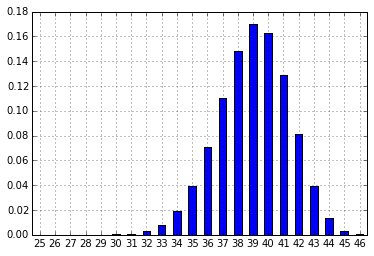

In [171]:
# Kontrollrechnung über die Wahrscheinlichkeitsdichte je Anzahl korrekter Quality Gates in Stichprobe
from scipy.stats import hypergeom
[M, n, N] = [500, (float(39)/46)*500, 46]
rv = hypergeom(M, n, N)
x = np.arange(25, 46+1)
pmf_QG = rv.pmf(x)
pmf_QG

import pandas as pd
pmf_QG_DF = pd.DataFrame(pmf_QG, columns=['Wahrscheinlichkeit'], index=x)
# Direktive für die Graphik-Ausgabe
%pylab inline
pmf_QG_DF.plot(kind = 'bar', rot = 0, legend = False)
